# Presentación final Grupo 24
### Integrantes: Battaglino Ignacio - Marcos Santiago - Rosli Bautista - Kesselman Federico

## 1- ¿Cómo divimos el trabajo y cómo nos organizamos con el repositorio?
#### Inicio: Bienvenida y funcionamiento del juego (Bauti)
#### (P1) Datos: Visualización de la info del juego con gráficos y mapas. (Bauti)
#### (P2) Juego: Juego de trivia con selección de usuario, temática y dificultad. (Nacho)
#### (P3) Formulario de registro: Crear cuenta para jugar. 
#### (P4) Ranking: Info de la última jugada y de mejores puntajes. (Bauti)
#### (P5) Estadisticas: Estadísticas de las jugadas. (Santi y Fede)

## 2- ¿Qué herramientas fueron utilizadas?
#### IDE: vscode 
#### Librerías primera parte: jupyter , streamlit , Unidecode
#### Librerías segunda parte: streamlit, pandas, unidecode, matplotlib, folium , streamlit_folium , streamlit-autorefresh
#### Herramientas para trabajar colaborativamente: GitLab

## 3- Primera complicación que tuvimos y cómo la solucionamos
#### - Delay en el sign in, cuando no existían usuarios cargados.
#### - Solución: Log in automático al registrarse .

## 4- Segunda complicación que tuvimos y cómo la solucionamos
#### - Problema en la implementación de las dificultades en la temática de conectividad
#### - Solución: Implementación de un timer a la hora de jugar 

---

### 5- ACTIVIDAD 6 POR PYTHON PLUS


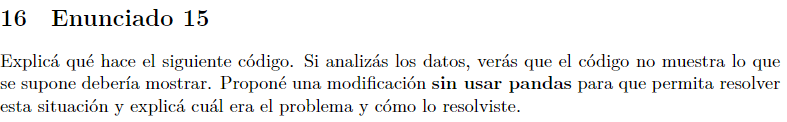

Veamos que hace el codigo proporcionado:

In [1]:
import csv

name_file = 'lagos_arg.csv'
with open(name_file, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    header, data = next(reader), reader

    pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]
    
    for pcia in pcias:
        for row in data:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur


¿Cuál es el problema? 

El problema es que no se busca sobre el archivo csv los datos que coinciden con la provincia "Buenos Aires" Debido a que el objeto
reader es un iterable que a puede ser utilizado una unica vez ya que el mismo se consume luego de cada iteracion.

Soluciones propuestas:

In [2]:
# Cargar todo el archivo en una lista para asi poder iterarlo multiples veces.
# Ventaja: Simplicidad para acceder a los datos del archivo, no es necesario abrir el archivo varias veces.
# Deventaja: Cargar todo el archivo en memoria no suele ser la opcion mas eficiente.

import csv

name_file = 'lagos_arg.csv'
with open(name_file, encoding='utf-8') as data_set:
    reader = csv.reader(data_set, delimiter=',')
    header, data = next(reader), list(reader)  # Convertir el iterador a una lista

    pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]
    
    for pcia in pcias:
        for row in data:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Epecuén está en Buenos Aires


In [3]:
# Volver a abrir el archivo para reiniciar el reader en cada provincia.
# Ventaja: Uso de memoria mas eficiente ya que no se carga todo el archivo.
# Deventaja: Reabrir el archivo repetidas veces puede ser un poco lento.

import csv

name_file = 'lagos_arg.csv'

pcias = ["Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Buenos Aires"]

for pcia in pcias: # Abrir el archivo por cada provincia.
    with open(name_file, encoding='utf-8') as data_set:
        reader = csv.reader(data_set, delimiter=',')
        header = next(reader) 

        for row in reader:
            if row[1] == pcia:
                print("El lago", row[0], "está en", pcia)


El lago Lago Yehuin está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Chepelmut está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Río Bueno está en Tierra del Fuego, Antártida e Islas del Atlántico Sur
El lago Lago Epecuén está en Buenos Aires


---

### Enunciado 12 Python Plus - Kesselman
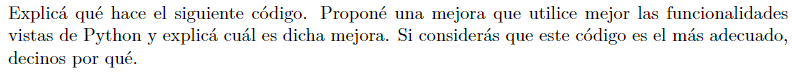

In [4]:
# Funcion que duplica el numero que recibe como parametro
def double(x):
    return x*2

# Crea una lista con cuatro enteros
numbers = [1, 2, 3, 4]

# Con un for itera dicha lista, aplicando la funcion a cada elemento e imprimiendo el resultado
for elem in numbers:
    print(double(elem), end=" ")

2 4 6 8 

### Mejora: 
Utilizar función **map** para aplicar *double* directamente a cada elemento de la lista. Luego se imprime sin necesidad del for utilizando print(*doubled_numbers, end=" ") , que va pasando uno a uno los elementos de *doubled_numbers* al print.

In [5]:
def double(x):
    return x*2

numbers = [1, 2, 3, 4]

# Map
doubled_numbers = map(double, numbers)

# Imprimir con * que pasa uno a uno los elementos de doubled_numbers
print(*doubled_numbers, end=" ")

2 4 6 8 

---

### Enunciado 7 Python Plus- Marcos
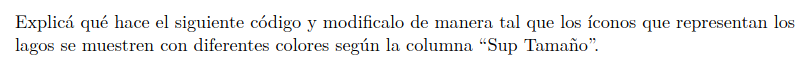

In [6]:
import pandas as pd
lagos = pd.read_csv('lagos_arg.csv')

In [7]:
import folium
def generate_map():
    attr = (
        '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a>'
        'contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>'
    )
    tiles = 'https://wms.ign.gob.ar/geoserver/gwc/service/tms/1.0.0/capabaseargenmap@EPSG%3A3857@png/{z}/{x}/{-y}.png'
    m = folium.Map(
        location=(-33.457606, -65.346857),
        control_scale=True,
        zoom_start=5,
        name='es',
        tiles=tiles,
        attr=attr
    )
    return m
def add_marker(row):
    folium.Marker(
        [row['Latitud en GD'], row['Longitud en GD']],
        popup=row['Nombre'],
        icon=folium.Icon()
        ).add_to(mapa)
mapa = generate_map()
lagos.apply(add_marker, axis=1)
mapa

#### Se puede solucionar con una nuea funcion que determina el color y modificando levemente add_marked:

In [8]:
def _get_color (elevation):
    """
    Recibe la elevación y retorna el color correspondiente a la elevación.
    """     
    if elevation == 'chico':
        color  = 'green'
    elif elevation == 'medio' :
        color = 'blue'
    else:
        color = 'red'
    return color

In [9]:
def add_marker(row):
    folium.Marker(
        [row['Latitud en GD'], row['Longitud en GD']],
        popup=row['Nombre'],
        icon=folium.Icon(color= _get_color(row['Sup Tamaño']))
        ).add_to(mapa)

In [10]:
mapa = generate_map()
lagos.apply(lambda row:add_marker(row), axis=1)
mapa

---

### Enunciado 12 Python Plus - Rosli
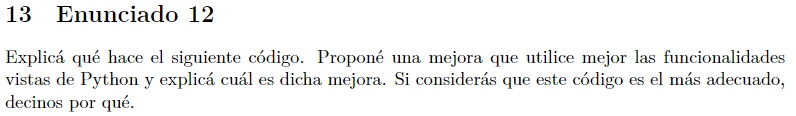

Este código tiene una función double(), la cual recibe por parámetro un elemento (número) y retorna el mismo elemento multiplicado por 2.
Para ello, itera sobre la lista en la cual se encuentran guardados los elementos e imprime el resultado de los mismos pasándolos como parámetro a la función double().

In [11]:
def double(x):
    return x*2

numbers = [1, 2, 3, 4]

for elem in numbers:
    print(double(elem), end=" ")

2 4 6 8 

Este código se puede mejorar reemplazando la función double(x) por una función lambda (dado que es una función simple), guardando los elementos modificados en una nueva lista para luego imprimirlos en pantalla.

In [12]:
numbers = [1, 2, 3, 4]
multiplied_numbers = map(lambda x: x * 2, numbers)
print(*multiplied_numbers) # el * desmpeaqueta la lista y pasa cada uno de los elementos de la misma a la función print() por parámetro

2 4 6 8
